In [1]:
import os
import numpy as np
import pandas as pd
import gzip
import requests
import time
from multiprocessing import Pool
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import datetime
import seaborn as sns

In [2]:
os.chdir('E:/CNSI_project/demo_and_data_3.0')

# Re-merge the labels of aim1

In [3]:
mimic_aim1 = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic_filtered_baidu.csv")
mimic_aim1

C:\Users\AaronChen\AppData\Local\Temp\ipykernel_10020\4254792609.py:1: DtypeWarning: Columns (2,4,6,7,10,11,14,15,23,29,30,33,42,43,44,60,61,66,67,68,76,80,81,82,84,85,86,92,101,103,106,107,112,121,125,126,127,128,129,133,134,137,141,142,152,156,162,166,167,168,169,170,171,172,173,175,176,183,185,186,187,188,194,195,196,204,230,234,235,248,272,299,311,313,323,336,337,342,354,413,456,458,530,531,532,533,545,585,590,597,775,777,807,812,817,819,823,824,827,831,853) have mixed types. Specify dtype option on import or set low_memory=False.
  mimic_aim1 = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic_filtered_baidu.csv")


,subject_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,...,Chemistry~Blood~Anti Hbe~53148~,Chemistry~Blood~Anti-hbs~53149~,Chemistry~Blood~Anti Hbs~53150~,Chemistry~Blood~Anti-la~53151~,Chemistry~Blood~HIV FINAL~53152~,Chemistry~Blood~HIV Screen~53153~,Chemistry~Blood~Lactate~53154~mmol/L,gender,age,BM
0,10027602,2201-11-06,NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,71,0
1,10027602,2201-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,71,0
2,10027704,2148-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,41,0
3,10027704,2149-04-03,NaN,-8.0~0.0,NaN,18.0~22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,42,0
4,10027957,2171-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,19990072,2180-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,30,0
11855,19990974,2154-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,22,0
11856,19994259,2128-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,41,0
11857,19995080,2147-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,59,0


In [4]:
# Define a function that converts a string of numbers concatenated with ~ to a numeric value and takes the last value.
def str_to_last(x):
    if isinstance(x, str) and '~' in x:
        nums = [float(num) for num in x.split('~')]
        return nums[-1]
    elif isinstance(x, str):
        return float(x)
    else:
        return x

In [5]:
mimic_aim1.iloc[:,2:-3] = mimic_aim1.iloc[:,2:-3].applymap(str_to_last)
mimic_aim1

,subject_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,...,Chemistry~Blood~Anti Hbe~53148~,Chemistry~Blood~Anti-hbs~53149~,Chemistry~Blood~Anti Hbs~53150~,Chemistry~Blood~Anti-la~53151~,Chemistry~Blood~HIV FINAL~53152~,Chemistry~Blood~HIV Screen~53153~,Chemistry~Blood~Lactate~53154~mmol/L,gender,age,BM
0,10027602,2201-11-06,NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,71,0
1,10027602,2201-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,71,0
2,10027704,2148-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,41,0
3,10027704,2149-04-03,NaN,0.0,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,42,0
4,10027957,2171-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,19990072,2180-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,30,0
11855,19990974,2154-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,22,0
11856,19994259,2128-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,41,0
11857,19995080,2147-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,59,0


In [6]:
mimic_aim2 = mimic_aim1.copy()
mimic_aim2 = mimic_aim2.dropna(axis=1, thresh=1, inplace=False)
mimic_aim2.rename(columns={'BM':'culture'},inplace=True)  # Multiple tests from the same hospitalisation are not necessarily culture positive every time, so you can't just use the culture results to judge the BM

,subject_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,Blood Gas~Blood~Glucose~50809~mg/dL,...,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",Hematology~Cerebrospinal Fluid~Young~52288~%,Hematology~Blood~Absolute Lymphocyte Count~52769~#/uL,gender,age,culture
0,10027602,2201-11-06,NaN,1.0,NaN,24.0,NaN,NaN,NaN,NaN,...,NaN,88.0,NaN,43750.0,44.0,NaN,NaN,F,71,0
1,10027602,2201-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.0,NaN,14.0,2.0,NaN,NaN,F,71,0
2,10027704,2148-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,2.0,2.0,NaN,NaN,M,41,0
3,10027704,2149-04-03,NaN,0.0,NaN,22.0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,1.0,NaN,NaN,M,42,0
4,10027957,2171-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,15.0,NaN,146.0,2.0,NaN,NaN,F,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,19990072,2180-07-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,17.0,165.0,NaN,NaN,F,30,0
11855,19990974,2154-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,4.0,2.0,NaN,NaN,M,22,0
11856,19994259,2128-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65.0,NaN,48250.0,75.0,NaN,NaN,F,41,0
11857,19995080,2147-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,1.0,3.0,NaN,912.0,M,59,0


In [7]:
# aim1 = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Processed_data/mimic/TrainingSet/mimic_aim1_dataset0.csv")
# aim1

In [8]:
aim1 = mimic_aim2.copy()

In [9]:
# Loading labevent data
filename = 'E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic-iv-2.2/hosp/labevents.csv.gz'
with gzip.open(filename, 'rt', encoding='utf-8') as file:
    lab_df = pd.read_csv(file)
lab_df

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,1,10000032,NaN,45421181,51237,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,1.4,1.40,NaN,0.9,1.1,abnormal,ROUTINE,NaN
1,2,10000032,NaN,45421181,51274,P28Z0X,2180-03-23 11:51:00,2180-03-23 15:15:00,___,15.10,sec,9.4,12.5,abnormal,ROUTINE,VERIFIED.
2,3,10000032,NaN,52958335,50853,P28Z0X,2180-03-23 11:51:00,2180-03-25 11:06:00,___,15.00,ng/mL,30.0,60.0,abnormal,ROUTINE,NEW ASSAY IN USE ___: DETECTS D2 AND D3 25-OH ...
3,4,10000032,NaN,52958335,50861,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,102,102.00,IU/L,0.0,40.0,abnormal,ROUTINE,NaN
4,5,10000032,NaN,52958335,50862,P28Z0X,2180-03-23 11:51:00,2180-03-23 16:40:00,3.3,3.30,g/dL,3.5,5.2,abnormal,ROUTINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118171362,118352501,19999987,23865745.0,85842100,51279,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,3.52,3.52,m/uL,4.2,5.4,abnormal,ROUTINE,NaN
118171363,118352502,19999987,23865745.0,85842100,51301,NaN,2145-11-09 05:30:00,2145-11-09 07:06:00,5.7,5.70,K/uL,4.0,11.0,NaN,ROUTINE,NaN
118171364,118352503,19999987,NaN,12592768,50912,P09IS0,2146-02-07 11:13:00,2146-02-07 16:26:00,1.1,1.10,mg/dL,0.4,1.1,NaN,ROUTINE,NaN
118171365,118352504,19999987,NaN,12592768,50920,P09IS0,2146-02-07 11:13:00,2146-02-07 16:26:00,NaN,NaN,NaN,NaN,NaN,NaN,ROUTINE,"Using this patient's age, gender, and serum cr..."


In [11]:
lab_df1 = lab_df[lab_df["subject_id"].isin(aim1["subject_id"])]
lab_df1['hadm_id'] = lab_df1['hadm_id'].astype('Int64')   # Transforms a floating-point number into an integer, leaving NaN unchanged.
lab_df1

C:\Users\AaronChen\AppData\Local\Temp\ipykernel_10020\1070614887.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_df1['hadm_id'] = lab_df1['hadm_id'].astype('Int64')   # 将浮点数转变为整数，NaN不变。


,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
8930,8945,10001217,<NA>,17915844,50887,NaN,2157-11-18 18:30:00,NaN,HOLD. DISCARD GREATER THAN 24 HRS OLD.,NaN,NaN,NaN,NaN,NaN,STAT,___
8931,8946,10001217,<NA>,27706469,51146,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.7,0.7,%,0.0,2.0,NaN,STAT,NaN
8932,8947,10001217,<NA>,27706469,51200,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.5,0.5,%,0.0,4.0,NaN,STAT,NaN
8933,8948,10001217,<NA>,27706469,51221,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,42.2,42.2,%,36.0,48.0,NaN,STAT,NaN
8934,8949,10001217,<NA>,27706469,51222,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,14.1,14.1,g/dL,12.0,16.0,NaN,STAT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169411,118350546,19999784,<NA>,78492229,50912,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1.0,1.0,mg/dL,0.5,1.2,NaN,STAT,NaN
118169412,118350547,19999784,<NA>,78492229,50934,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,14,14.0,NaN,NaN,NaN,NaN,STAT,NaN
118169413,118350548,19999784,<NA>,78492229,50947,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1,1.0,NaN,NaN,NaN,NaN,STAT,NaN
118169414,118350549,19999784,<NA>,78492229,51006,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,15,15.0,mg/dL,6.0,20.0,NaN,STAT,NaN


In [12]:
lab_df1[lab_df1["subject_id"]==10001217].iloc[55:60]

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
8985,9001,10001217,<NA>,98991065,51237,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,1.0,1.0,NaN,0.9,1.1,NaN,STAT,NaN
8986,9002,10001217,<NA>,98991065,51274,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,11.2,11.2,sec,9.4,12.5,NaN,STAT,NaN
8987,9003,10001217,<NA>,98991065,51275,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,40.3,40.3,sec,25.0,36.5,abnormal,STAT,NaN
8988,9004,10001217,24597018,69818655,51790,NaN,2157-11-19 02:37:00,2157-11-19 03:19:00,59,59.0,mg/dL,NaN,NaN,NaN,ROUTINE,NaN
8989,9005,10001217,24597018,69818655,51802,NaN,2157-11-19 02:37:00,2157-11-19 03:19:00,42,42.0,mg/dL,15.0,45.0,NaN,ROUTINE,NaN


# Testing information within 7 days prior to official hospitalisation

In [13]:
lab_df2 = lab_df1.copy()
lab_df2["chartdate"] = lab_df2["charttime"].str[:10]
lab_df2["chartdate0"] = pd.to_datetime(lab_df2["chartdate"], format='%Y/%m/%d')
lab_df2["chartdate0"] = lab_df2["chartdate0"].apply(lambda x: int((x - datetime.datetime(1970,1,1)).total_seconds()))
lab_df2

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,chartdate,chartdate0
8930,8945,10001217,<NA>,17915844,50887,NaN,2157-11-18 18:30:00,NaN,HOLD. DISCARD GREATER THAN 24 HRS OLD.,NaN,NaN,NaN,NaN,NaN,STAT,___,2157-11-18,5928940800
8931,8946,10001217,<NA>,27706469,51146,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.7,0.7,%,0.0,2.0,NaN,STAT,NaN,2157-11-18,5928940800
8932,8947,10001217,<NA>,27706469,51200,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.5,0.5,%,0.0,4.0,NaN,STAT,NaN,2157-11-18,5928940800
8933,8948,10001217,<NA>,27706469,51221,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,42.2,42.2,%,36.0,48.0,NaN,STAT,NaN,2157-11-18,5928940800
8934,8949,10001217,<NA>,27706469,51222,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,14.1,14.1,g/dL,12.0,16.0,NaN,STAT,NaN,2157-11-18,5928940800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169411,118350546,19999784,<NA>,78492229,50912,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1.0,1.0,mg/dL,0.5,1.2,NaN,STAT,NaN,2122-05-10,4807814400
118169412,118350547,19999784,<NA>,78492229,50934,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,14,14.0,NaN,NaN,NaN,NaN,STAT,NaN,2122-05-10,4807814400
118169413,118350548,19999784,<NA>,78492229,50947,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1,1.0,NaN,NaN,NaN,NaN,STAT,NaN,2122-05-10,4807814400
118169414,118350549,19999784,<NA>,78492229,51006,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,15,15.0,mg/dL,6.0,20.0,NaN,STAT,NaN,2122-05-10,4807814400


In [14]:
lab_dff = lab_df2.copy()

lab_dff['chartdate0'] = pd.to_datetime(lab_dff['chartdate0'], unit='s')

lab_dff.sort_values(['subject_id', 'chartdate0'], inplace=True)

lab_dff['hadm_start'] = lab_dff.loc[lab_dff['hadm_id'].notnull(), 'chartdate0']
lab_dff['hadm_end'] = lab_dff.groupby(['subject_id', 'hadm_id'])['chartdate0'].transform('max')

lab_dff['nearest_hadm'] = lab_dff['hadm_id'].fillna(method='bfill')
lab_dff['nearest_hadm_start'] = lab_dff['hadm_start'].fillna(method='bfill')
lab_dff['nearest_hadm_end'] = lab_dff['hadm_end'].fillna(method='bfill')

lab_dff.loc[(lab_dff['chartdate0'] >= lab_dff['nearest_hadm_start'] - pd.Timedelta(days=7)) & (lab_dff['chartdate0'] < lab_dff['nearest_hadm_start']), 'hadm_id'] = lab_dff['nearest_hadm']
lab_dff

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,...,flag,priority,comments,chartdate,chartdate0,hadm_start,hadm_end,nearest_hadm,nearest_hadm_start,nearest_hadm_end
8930,8945,10001217,24597018,17915844,50887,NaN,2157-11-18 18:30:00,NaN,HOLD. DISCARD GREATER THAN 24 HRS OLD.,NaN,...,NaN,STAT,___,2157-11-18,2157-11-18,NaT,NaT,24597018,2157-11-19,2157-11-25
8931,8946,10001217,24597018,27706469,51146,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.7,0.7,...,NaN,STAT,NaN,2157-11-18,2157-11-18,NaT,NaT,24597018,2157-11-19,2157-11-25
8932,8947,10001217,24597018,27706469,51200,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.5,0.5,...,NaN,STAT,NaN,2157-11-18,2157-11-18,NaT,NaT,24597018,2157-11-19,2157-11-25
8933,8948,10001217,24597018,27706469,51221,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,42.2,42.2,...,NaN,STAT,NaN,2157-11-18,2157-11-18,NaT,NaT,24597018,2157-11-19,2157-11-25
8934,8949,10001217,24597018,27706469,51222,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,14.1,14.1,...,NaN,STAT,NaN,2157-11-18,2157-11-18,NaT,NaT,24597018,2157-11-19,2157-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169411,118350546,19999784,<NA>,78492229,50912,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1.0,1.0,...,NaN,STAT,NaN,2122-05-10,2122-05-10,NaT,NaT,<NA>,NaT,NaT
118169412,118350547,19999784,<NA>,78492229,50934,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,14,14.0,...,NaN,STAT,NaN,2122-05-10,2122-05-10,NaT,NaT,<NA>,NaT,NaT
118169413,118350548,19999784,<NA>,78492229,50947,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1,1.0,...,NaN,STAT,NaN,2122-05-10,2122-05-10,NaT,NaT,<NA>,NaT,NaT
118169414,118350549,19999784,<NA>,78492229,51006,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,15,15.0,...,NaN,STAT,NaN,2122-05-10,2122-05-10,NaT,NaT,<NA>,NaT,NaT


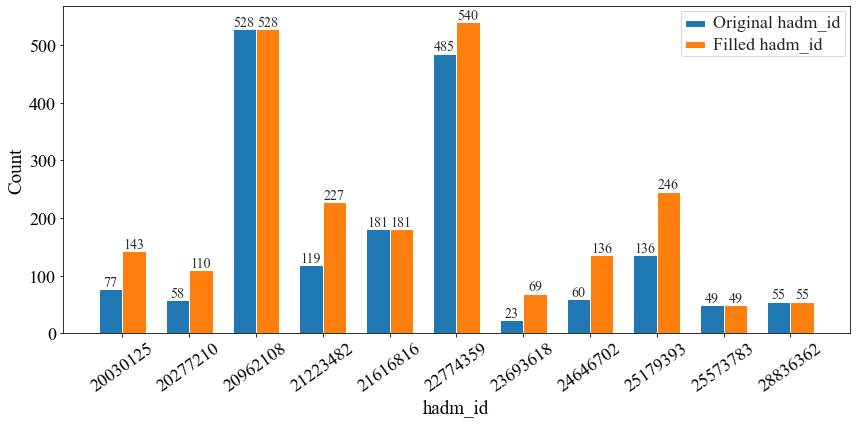

In [15]:
# Compare before and after null filling  10003019
certain_subject = 10003019

before = lab_df2[lab_df2['subject_id']==certain_subject]
after = lab_dff[lab_dff['subject_id'] == certain_subject]

hadm_counts_before = before['hadm_id'].value_counts().sort_index()
hadm_counts_after = after['hadm_id'].value_counts().sort_index()

all_categories = np.union1d(hadm_counts_before.index, hadm_counts_after.index)
hadm_counts_before = hadm_counts_before.reindex(all_categories, fill_value=0)
hadm_counts_after = hadm_counts_after.reindex(all_categories, fill_value=0)

fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")
x = np.arange(len(all_categories))

width = 0.35
bar1 = ax.bar(x - width/2, hadm_counts_before.values, width, label='Original hadm_id')
bar2 = ax.bar(x + width/2, hadm_counts_after.values, width, label='Filled hadm_id')

# ax.set_title('Comparison of Original and Filled hadm_id for subject_id {}'.format(certain_subject), fontsize=20, fontname='Times New Roman')
ax.set_xlabel('hadm_id', fontsize=19, fontname='Times New Roman')
ax.set_ylabel('Count', fontsize=19, fontname='Times New Roman')

ax.set_xticks(x)
ax.set_xticklabels(hadm_counts_before.index, rotation=35,fontsize=18, fontname='Times New Roman')

# ax.set_yticklabels(ax.get_yticks(),fontsize=13)
plt.yticks(fontsize=18, fontname='Times New Roman')

for rect1, rect2 in zip(bar1, bar2):
    height1 = rect1.get_height()
    height2 = rect2.get_height()
    ax.annotate('{}'.format(height1), xy=(rect1.get_x() + rect1.get_width() / 2, height1), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom', fontsize=14, fontname='Times New Roman')
    ax.annotate('{}'.format(height2), xy=(rect2.get_x() + rect2.get_width() / 2, height2), xytext=(0, 0),
                textcoords="offset points", ha='center', va='bottom', fontsize=14, fontname='Times New Roman')

legend = ax.legend()
for text in legend.get_texts():
    text.set_fontname('Times New Roman')
    text.set_fontsize(18)

plt.tight_layout()

path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper", "preHospital7.tif")
plt.savefig(path, dpi=300, bbox_inches='tight')

plt.show()

In [14]:
# Deleting added secondary columns
lab_df3= lab_dff.drop(['hadm_start', 'hadm_end', 'nearest_hadm', 'nearest_hadm_start', 'nearest_hadm_end'], axis=1, inplace=False)
lab_df3

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,chartdate,chartdate0
8930,8945,10001217,24597018,17915844,50887,NaN,2157-11-18 18:30:00,NaN,HOLD. DISCARD GREATER THAN 24 HRS OLD.,NaN,NaN,NaN,NaN,NaN,STAT,___,2157-11-18,2157-11-18
8931,8946,10001217,24597018,27706469,51146,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.7,0.7,%,0.0,2.0,NaN,STAT,NaN,2157-11-18,2157-11-18
8932,8947,10001217,24597018,27706469,51200,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,0.5,0.5,%,0.0,4.0,NaN,STAT,NaN,2157-11-18,2157-11-18
8933,8948,10001217,24597018,27706469,51221,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,42.2,42.2,%,36.0,48.0,NaN,STAT,NaN,2157-11-18,2157-11-18
8934,8949,10001217,24597018,27706469,51222,NaN,2157-11-18 18:30:00,2157-11-18 18:56:00,14.1,14.1,g/dL,12.0,16.0,NaN,STAT,NaN,2157-11-18,2157-11-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118169411,118350546,19999784,<NA>,78492229,50912,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1.0,1.0,mg/dL,0.5,1.2,NaN,STAT,NaN,2122-05-10,2122-05-10
118169412,118350547,19999784,<NA>,78492229,50934,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,14,14.0,NaN,NaN,NaN,NaN,STAT,NaN,2122-05-10,2122-05-10
118169413,118350548,19999784,<NA>,78492229,50947,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,1,1.0,NaN,NaN,NaN,NaN,STAT,NaN,2122-05-10,2122-05-10
118169414,118350549,19999784,<NA>,78492229,51006,P50TA4,2122-05-10 11:30:00,2122-05-10 12:05:00,15,15.0,mg/dL,6.0,20.0,NaN,STAT,NaN,2122-05-10,2122-05-10


In [15]:
# Count the number of non-nulls in hadm_id before and after compensating for nulls.
hadm_before = lab_df2['hadm_id'].count()
hadm_after = lab_df3['hadm_id'].count()
print(f"原hadm_id的非空个数为{hadm_before}，填充后的为{hadm_after}，增加了{(hadm_after-hadm_before)/hadm_before}")

原hadm_id的非空个数为7378238，填充后的为8340248，增加了0.13038478834648598


In [17]:
tempp = lab_df1[lab_df1["subject_id"]==10001217].iloc[55:60]
tempp

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
8985,9001,10001217,<NA>,98991065,51237,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,1.0,1.0,NaN,0.9,1.1,NaN,STAT,NaN
8986,9002,10001217,<NA>,98991065,51274,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,11.2,11.2,sec,9.4,12.5,NaN,STAT,NaN
8987,9003,10001217,<NA>,98991065,51275,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,40.3,40.3,sec,25.0,36.5,abnormal,STAT,NaN
8988,9004,10001217,24597018,69818655,51790,NaN,2157-11-19 02:37:00,2157-11-19 03:19:00,59,59.0,mg/dL,NaN,NaN,NaN,ROUTINE,NaN
8989,9005,10001217,24597018,69818655,51802,NaN,2157-11-19 02:37:00,2157-11-19 03:19:00,42,42.0,mg/dL,15.0,45.0,NaN,ROUTINE,NaN


In [18]:
lab_df3[lab_df3["subject_id"]==10001217].iloc[55:60]

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments,chartdate,chartdate0
8985,9001,10001217,24597018,98991065,51237,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,1.0,1.0,NaN,0.9,1.1,NaN,STAT,NaN,2157-11-18,2157-11-18
8986,9002,10001217,24597018,98991065,51274,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,11.2,11.2,sec,9.4,12.5,NaN,STAT,NaN,2157-11-18,2157-11-18
8987,9003,10001217,24597018,98991065,51275,NaN,2157-11-18 22:14:00,2157-11-18 22:31:00,40.3,40.3,sec,25.0,36.5,abnormal,STAT,NaN,2157-11-18,2157-11-18
8988,9004,10001217,24597018,69818655,51790,NaN,2157-11-19 02:37:00,2157-11-19 03:19:00,59,59.0,mg/dL,NaN,NaN,NaN,ROUTINE,NaN,2157-11-19,2157-11-19
8989,9005,10001217,24597018,69818655,51802,NaN,2157-11-19 02:37:00,2157-11-19 03:19:00,42,42.0,mg/dL,15.0,45.0,NaN,ROUTINE,NaN,2157-11-19,2157-11-19


# Adding the hadm_id column to the data in aim1

In [19]:
temp1 = lab_df3[['subject_id','chartdate','hadm_id']]
# temp1 = temp1.drop_duplicates(keep='first')
temp1 = temp1.drop_duplicates(subset=['subject_id','chartdate'], keep='first')
temp1 = temp1.dropna()
temp1

,subject_id,chartdate,hadm_id
8930,10001217,2157-11-18,24597018
8988,10001217,2157-11-19,24597018
8995,10001217,2157-11-20,24597018
9020,10001217,2157-11-21,24597018
9043,10001217,2157-11-22,24597018
...,...,...,...
118168548,19999784,2121-06-01,24755486
118168596,19999784,2121-06-02,24755486
118168644,19999784,2121-06-03,24755486
118168694,19999784,2121-06-04,24755486


In [20]:
aim1_merged = aim1.merge(temp1, on=['subject_id','chartdate'], how='left')
new_order = aim1_merged.columns.tolist()[:1] + aim1_merged.columns.tolist()[-1:] + aim1_merged.columns.tolist()[1:-1]
aim1_merged = aim1_merged[new_order]
aim1_merged = aim1_merged.sort_values(['subject_id','hadm_id','chartdate'])
aim1_merged

,subject_id,hadm_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,...,Hematology~Cerebrospinal Fluid~Plasma~52279~%,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",Hematology~Cerebrospinal Fluid~Young~52288~%,Hematology~Blood~Absolute Lymphocyte Count~52769~#/uL,gender,age,culture
4877,10001217,24597018,2157-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,5.0,0.0,NaN,NaN,F,55,0
4878,10002557,<NA>,2147-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,2.0,1.0,NaN,NaN,F,77,0
4879,10002559,<NA>,2179-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.0,NaN,334.0,4.0,NaN,NaN,M,21,0
4880,10003019,21616816,2174-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,NaN,430.0,10.0,NaN,NaN,M,72,0
4881,10005808,26543907,2119-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,510.0,1.0,NaN,NaN,M,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872,19994772,<NA>,2181-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,NaN,250.0,7800.0,NaN,NaN,F,55,0
11857,19995080,23057109,2147-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,1.0,3.0,NaN,912.0,M,59,0
11858,19997843,<NA>,2120-11-18,NaN,-2.0,NaN,22.0,NaN,NaN,1.16,...,NaN,9.0,NaN,4.0,0.0,NaN,NaN,M,47,0
4876,19999784,24935234,2119-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,4.0,26.0,NaN,NaN,M,57,0


In [21]:
aim1_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11859 entries, 4877 to 4875
Columns: 296 entries, subject_id to culture
dtypes: Int64(1), float64(290), int64(3), object(2)
memory usage: 26.9+ MB


In [22]:
temp1 = aim1_merged.hadm_id.value_counts()
print(f"得过细菌性脑膜炎的病人，人均住院次数为{aim1_merged['hadm_id'].count()/len(temp1)}次" )
print(f"因细菌性脑膜炎住院次数最多的为{temp1.values[0]}次")
temp1

得过细菌性脑膜炎的病人，人均住院次数为1.224197445633414次
因细菌性脑膜炎住院次数最多的为17次


27892723    17
21205090    15
23808923    13
20401746    12
27859317    12
            ..
27293200     1
29073652     1
23263183     1
21512906     1
26194817     1
Name: hadm_id, Length: 5794, dtype: Int64

# merge ICD

In [23]:
# uploading diagnoses_icd
diag_icd = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic-iv-2.2/hosp/diagnoses_icd.csv")
diag_icd

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9
...,...,...,...,...,...
4756321,19999987,23865745,7,41401,9
4756322,19999987,23865745,8,78039,9
4756323,19999987,23865745,9,0413,9
4756324,19999987,23865745,10,36846,9


In [24]:
diag_icd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4756326 entries, 0 to 4756325
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   subject_id   int64 
 1   hadm_id      int64 
 2   seq_num      int64 
 3   icd_code     object
 4   icd_version  int64 
dtypes: int64(4), object(1)
memory usage: 181.4+ MB


In [25]:
grouped = diag_icd.groupby('icd_code')['icd_version'].nunique()

icd_codes = grouped[grouped > 1].index
result = diag_icd[diag_icd['icd_code'].isin(icd_codes)]
result

,subject_id,hadm_id,seq_num,icd_code,icd_version
470,10001401,24818636,12,E8342,10
1947,10003019,21213148,3,E8889,9
2101,10003203,25146997,3,E8889,9
2311,10003400,23559586,24,E8809,10
2963,10004401,29988601,7,E8809,9
...,...,...,...,...,...
4754036,19995012,29354459,1,E8342,10
4754039,19995012,29354459,4,E8351,10
4754510,19996783,21880161,23,E8809,10
4755626,19998497,27909016,9,E8889,9


In [26]:
# Versions 9 and 10 of the same icd_code correspond to different icd_texts.
mult_versionICD = result['icd_code'].unique()
mult_versionICD

array(['E8342', 'E8889', 'E8809', 'E8352', 'E8849', 'E8881', 'E882',
       'E8801', 'E8351', 'E8840', 'E8581', 'E8389', 'E848', 'E8381',
       'E8841', 'E8582', 'E851', 'E8589', 'E896', 'E895'], dtype=object)

In [27]:
result['icd_code'].value_counts()

E8889    5337
E8342    2621
E8809    2377
E8351    1033
E8352     881
E8881     632
E8849     428
E882      198
E8801     187
E8581      43
E8582      34
E8840      31
E8841      31
E8589      28
E848       27
E8389      24
E896       20
E851       17
E8381      14
E895        6
Name: icd_code, dtype: int64

In [28]:
# eg
result[result['icd_code']=='E8809']

,subject_id,hadm_id,seq_num,icd_code,icd_version
2311,10003400,23559586,24,E8809,10
2963,10004401,29988601,7,E8809,9
3282,10005001,25115899,2,E8809,10
5426,10010663,22209635,12,E8809,10
6281,10012476,22014575,5,E8809,9
...,...,...,...,...,...
4743573,19970947,28546800,4,E8809,9
4745307,19974520,23580334,6,E8809,10
4750896,19989030,21613555,4,E8809,9
4750975,19989134,24741104,17,E8809,9


In [29]:
# uploading d_icd
d_icd = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic-iv-2.2/hosp/d_icd_diagnoses.csv")
d_icd

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
109770,Z992,10,Dependence on renal dialysis
109771,Z993,10,Dependence on wheelchair
109772,Z998,10,Dependence on other enabling machines and devices
109773,Z9981,10,Dependence on supplemental oxygen


In [30]:
d_icd.drop_duplicates(keep='first')

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A
...,...,...,...
109770,Z992,10,Dependence on renal dialysis
109771,Z993,10,Dependence on wheelchair
109772,Z998,10,Dependence on other enabling machines and devices
109773,Z9981,10,Dependence on supplemental oxygen


In [31]:
# The long_title of icd has no duplicates, but the same icd_code has a different long_title under different versions, so when referencing the long_title of icd, you must take the version with you
mult_versionText = d_icd[d_icd['icd_code'].isin(mult_versionICD)]
mult_versionText

,icd_code,icd_version,long_title
17424,E8342,9,Other fall from one level to another in water ...
17425,E8342,10,Hypomagnesemia
17437,E8351,9,Other and unspecified fall in water transport ...
17438,E8351,10,Hypocalcemia
17439,E8352,9,Other and unspecified fall in water transport ...
17440,E8352,10,Hypercalcemia
17471,E8381,9,Other and unspecified water transport accident...
17472,E8381,10,Hungry bone syndrome
17480,E8389,9,Other and unspecified water transport accident...
17481,E8389,10,Other disorders of mineral metabolism


In [32]:
mult_versionText['long_title'].values

array(['Other fall from one level to another in water transport injuring occupant of other watercraft -- crew',
       'Hypomagnesemia',
       'Other and unspecified fall in water transport injuring occupant of small boat, powered',
       'Hypocalcemia',
       'Other and unspecified fall in water transport injuring occupant of other watercraft -- crew',
       'Hypercalcemia',
       'Other and unspecified water transport accident injuring occupant of small boat, powered',
       'Hungry bone syndrome',
       'Other and unspecified water transport accident injuring unspecified person',
       'Other disorders of mineral metabolism',
       'Accidents involving other vehicles, not elsewhere classifiable',
       'Cystic fibrosis with other manifestations',
       'Accidental poisoning by barbiturates',
       'Neuropathic heredofamilial amyloidosis',
       'Accidental poisoning by primarily systemic agents',
       'Light chain (AL) amyloidosis',
       'Accidental poisoning by age

In [33]:
diag_icd1 = diag_icd.copy()
diag_icd1 = diag_icd1.merge(d_icd, on=['icd_code','icd_version'], how='left')
diag_icd1

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10000032,22595853,1,5723,9,Portal hypertension
1,10000032,22595853,2,78959,9,Other ascites
2,10000032,22595853,3,5715,9,Cirrhosis of liver without mention of alcohol
3,10000032,22595853,4,07070,9,Unspecified viral hepatitis C without hepatic ...
4,10000032,22595853,5,496,9,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...,...
4756321,19999987,23865745,7,41401,9,Coronary atherosclerosis of native coronary ar...
4756322,19999987,23865745,8,78039,9,Other convulsions
4756323,19999987,23865745,9,0413,9,Friedländer's bacillus infection in conditions...
4756324,19999987,23865745,10,36846,9,Homonymous bilateral field defects


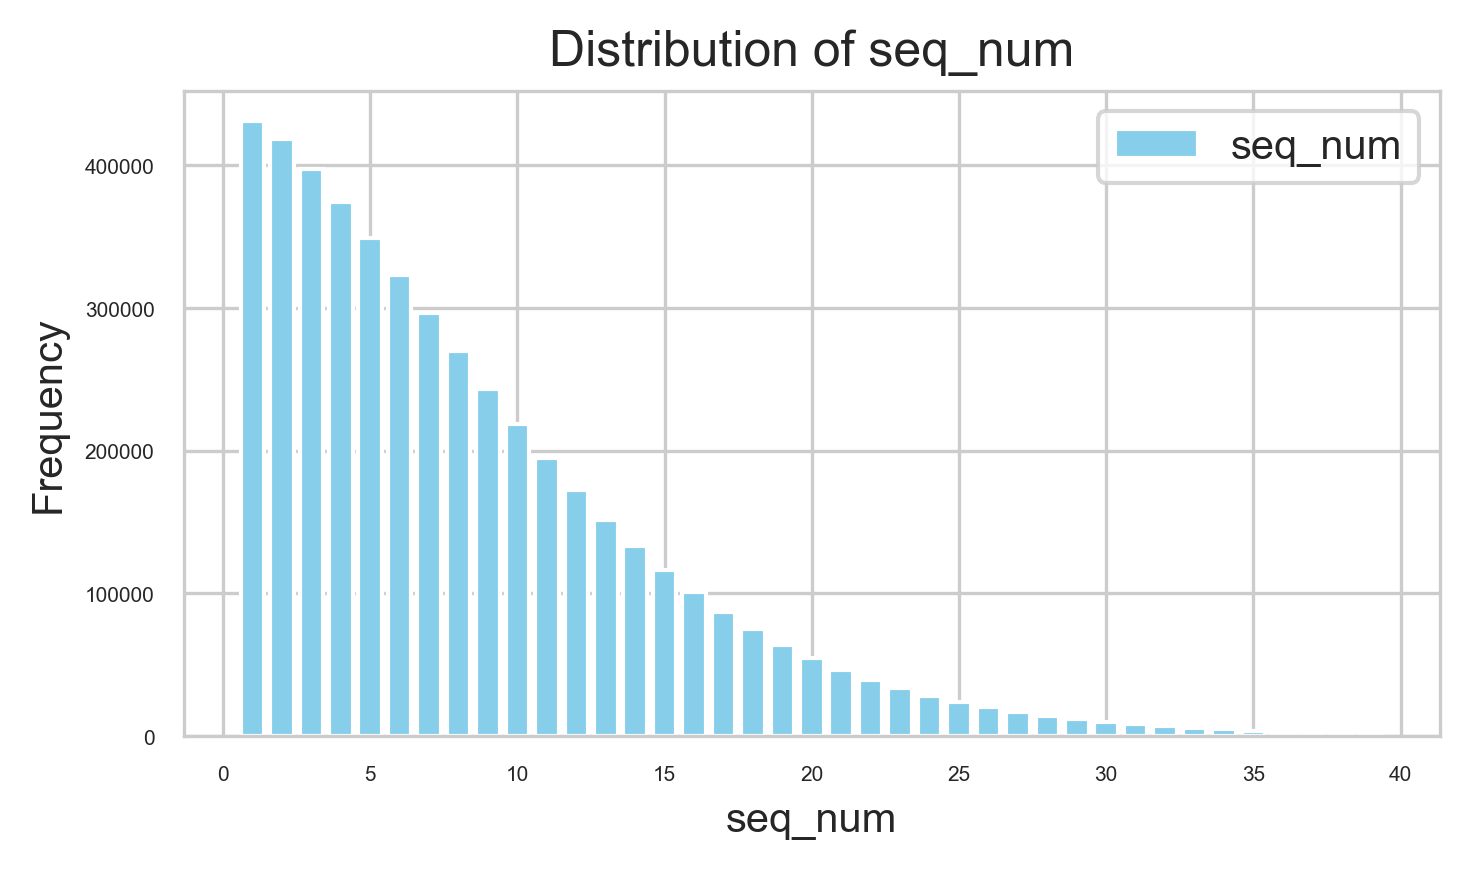

In [34]:
plt.figure(figsize=(5, 3), dpi=300)

counts = diag_icd1['seq_num'].value_counts().sort_index()

plt.bar(counts.index, counts.values, color='skyblue')

plt.title('Distribution of seq_num')
plt.xlabel('seq_num')
plt.ylabel('Frequency')

plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.legend(['seq_num'])

plt.tight_layout()

# plt.savefig('seq_num_distribution.pdf')
plt.show()

In [35]:
# It can be seen that there are at most 39 icd's corresponding to hadm_id, and the test reveals that there are no duplicates for these 39
diag_icd1[diag_icd1['hadm_id'].isin(aim1_merged['hadm_id'])].sort_values(['seq_num'])

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
409,10001217,24597018,1,3240,9,Intracranial abscess
1825484,13843038,22899449,1,44324,9,Dissection of vertebral artery
1825958,13844441,25544605,1,0389,9,Unspecified septicemia
1826657,13846210,25689477,1,43491,9,"Cerebral artery occlusion, unspecified with ce..."
1828126,13849575,28430525,1,340,9,Multiple sclerosis
...,...,...,...,...,...,...
883821,11881615,22729232,39,K37,10,Unspecified appendicitis
1005937,12134620,25109179,39,E876,10,Hypokalemia
3517433,17396940,26463898,39,R740,10,Nonspecific elevation of levels of transaminas...
1059690,12246674,22510763,39,Z794,10,Long term (current) use of insulin


In [36]:
diag_icd1[diag_icd1['hadm_id']==21492392].sort_values(['icd_code'])

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
1708937,13588636,21492392,1,A419,10,"Sepsis, unspecified organism"
1708954,13588636,21492392,18,B3781,10,Candidal esophagitis
1708957,13588636,21492392,21,B952,10,Enterococcus as the cause of diseases classifi...
1708963,13588636,21492392,27,D539,10,"Nutritional anemia, unspecified"
1708949,13588636,21492392,13,D62,10,Acute posthemorrhagic anemia
1708953,13588636,21492392,17,D689,10,"Coagulation defect, unspecified"
1708965,13588636,21492392,29,E785,10,"Hyperlipidemia, unspecified"
1708959,13588636,21492392,23,E8339,10,Other disorders of phosphorus metabolism
1708960,13588636,21492392,24,E875,10,Hyperkalemia
1708961,13588636,21492392,25,E876,10,Hypokalemia


In [37]:
# 1, merge the long_title corresponding to each hadm_id together, separated by semicolons;
# 2. The length of the string will be truncated in later NLP processing, so it also needs to be sorted for priority, i.e. seq_num.
diag_icd2 = diag_icd1.copy()
diag_icd2.sort_values(['subject_id','hadm_id','seq_num'],inplace=True)
diag_icd2 = (diag_icd2.groupby(['subject_id','hadm_id'])['long_title']
            .apply(lambda x: "; ".join(np.unique(x.dropna().astype(str))))
            .reset_index())
diag_icd2

,subject_id,hadm_id,long_title
0,10000032,22595853,"Bipolar disorder, unspecified; Chronic airway ..."
1,10000032,22841357,Asymptomatic human immunodeficiency virus [HIV...
2,10000032,25742920,Asymptomatic human immunodeficiency virus [HIV...
3,10000032,29079034,Asymptomatic human immunodeficiency virus [HIV...
4,10000068,25022803,"Alcohol abuse, unspecified"
...,...,...,...
430847,19999828,25744818,"Anxiety disorder, unspecified; Chronic obstruc..."
430848,19999828,29734428,Acquired absence of other specified parts of d...
430849,19999840,21033226,Acute respiratory failure; Foreign body in lar...
430850,19999840,26071774,"Cerebral artery occlusion, unspecified with ce..."


In [38]:
# merge
aim1_merged1 = aim1_merged.copy()
aim1_merged1['hadm_id'] = aim1_merged1['hadm_id'].astype(np.float64)
aim1_merged1['hadm_id'] = aim1_merged1['hadm_id'].fillna(0)
aim1_merged1 = aim1_merged1.merge(diag_icd2, on=['subject_id','hadm_id'], how='left')
aim1_merged1['hadm_id'] = aim1_merged1['hadm_id'].astype(np.int64)
aim1_merged1['hadm_id'] = aim1_merged1['hadm_id'].replace(0,float('nan'))
aim1_merged1

,subject_id,hadm_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,...,Hematology~Cerebrospinal Fluid~Polys~52281~%,Hematology~Cerebrospinal Fluid~Promyelocytes~52283~%,"Hematology~Cerebrospinal Fluid~RBC, CSF~52285~#/uL","Hematology~Cerebrospinal Fluid~Total Nucleated Cells, CSF~52286~#/uL",Hematology~Cerebrospinal Fluid~Young~52288~%,Hematology~Blood~Absolute Lymphocyte Count~52769~#/uL,gender,age,culture,long_title
0,10001217,24597018.0,2157-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,5.0,0.0,NaN,NaN,F,55,0,Cerebral edema; Compression of brain; Family h...
1,10002557,NaN,2147-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,2.0,1.0,NaN,NaN,F,77,0,NaN
2,10002559,NaN,2179-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.0,NaN,334.0,4.0,NaN,NaN,M,21,0,NaN
3,10003019,21616816.0,2174-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,430.0,10.0,NaN,NaN,M,72,0,"Acute kidney failure, unspecified; Asthma, uns..."
4,10005808,26543907.0,2119-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,510.0,1.0,NaN,NaN,M,53,0,Acute infective polyneuritis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,19994772,NaN,2181-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,NaN,250.0,7800.0,NaN,NaN,F,55,0,NaN
11855,19995080,23057109.0,2147-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,1.0,3.0,NaN,912.0,M,59,0,Calculus of gallbladder and bile duct without ...
11856,19997843,NaN,2120-11-18,NaN,-2.0,NaN,22.0,NaN,NaN,1.16,...,9.0,NaN,4.0,0.0,NaN,NaN,M,47,0,NaN
11857,19999784,24935234.0,2119-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,4.0,26.0,NaN,NaN,M,57,0,Abnormal cytological findings in cerebrospinal...


In [39]:
aim1_merged1['long_title'].values

array(['Cerebral edema; Compression of brain; Family history of malignant neoplasm of trachea, bronchus, and lung; Family history of other specified malignant neoplasm; Intracranial abscess; Multiple sclerosis; Pulmonary collapse; Streptococcus infection in conditions classified elsewhere and of unspecified site, other streptococcus; Tobacco use disorder; Unspecified essential hypertension',
       nan, nan, ..., nan,
       'Abnormal cytological findings in cerebrospinal fluid; Dysphonia; Monoclonal gammopathy; Nicotine dependence, cigarettes, uncomplicated; Other dysphagia; Other specified diseases of spinal cord; Paralysis of vocal cords and larynx, unilateral; Radiculopathy, lumbar region; Weakness',
       'Anemia, unspecified; Body mass index (BMI) 23.0-23.9, adult; Decreased white blood cell count, unspecified; Disease of spinal cord, unspecified; Moderate protein-calorie malnutrition; Monoclonal gammopathy; Nicotine dependence, cigarettes, uncomplicated; Non-Hodgkin lymphoma, u

# Adding ICD and other information in the ED

In [40]:
diag = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic-iv-ed-2.2/ed/diagnosis.csv")
diag

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,07070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES
...,...,...,...,...,...,...
899045,19999828,30712109,1,K632,10,Fistula of intestine
899046,19999828,32917002,1,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
899047,19999828,32917002,2,Z7984,10,Long term (current) use of oral hypoglycemic d...
899048,19999914,32002659,1,R4182,10,"Altered mental status, unspecified"


In [41]:
diag1 = diag[diag['subject_id'].isin(aim1_merged1['subject_id'])]
diag1

,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
133,10001217,39300221,1,V5881,9,REMOVAL VASCULAR CATHETER
134,10001217,39866888,1,78079,9,OTHER MALAISE AND FATIGUE
135,10001217,39866888,2,78060,9,"FEVER, UNSPECIFIED"
280,10002557,30719233,1,N938,10,Other specified abnormal uterine and vaginal b...
281,10002557,30719233,2,Z98890,10,Other specified postprocedural states
...,...,...,...,...,...,...
899040,19999784,34149746,2,G960,10,Cerebrospinal fluid leak
899041,19999784,34149746,3,Y838,10,"Oth surgical procedures cause abn react/compl,..."
899042,19999784,34149746,4,Y9289,10,Oth places as the place of occurrence of the e...
899043,19999784,35692999,1,R531,10,Weakness


In [42]:
diag2 = diag1.copy()
diag3 = (diag2.groupby(['subject_id','stay_id'])['icd_title']
         .apply(lambda x: "; ".join(x.dropna().astype(str)))
         .reset_index()
        )
diag3

,subject_id,stay_id,icd_title
0,10001217,39300221,REMOVAL VASCULAR CATHETER
1,10001217,39866888,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED"
2,10002557,30719233,Other specified abnormal uterine and vaginal b...
3,10002557,31555596,ABDOMINAL PAIN RLQ; CALCULUS OF KIDNEY; HYPERT...
4,10002557,33171946,Displacement of oth urinary devices and implan...
...,...,...,...
26380,19994772,38620706,MENINGITIS NOS; UNSPECIFIED CAUSES OF ENCEPHAL...
26381,19997843,39735561,"Altered mental status, unspecified"
26382,19999784,34149746,Oth postproc complications and disorders of ne...
26383,19999784,35692999,Weakness


In [43]:
edstays = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic-iv-ed-2.2/ed/edstays.csv")
edstays

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED
...,...,...,...,...,...,...,...,...,...
425082,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:29,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED
425083,19999828,25744818.0,32917002,2149-01-08 09:11:00,2149-01-08 18:12:00,F,WHITE,AMBULANCE,ADMITTED
425084,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED
425085,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED


In [44]:
edstays['stay_id'].value_counts()

33258284    1
37838401    1
36735478    1
36065883    1
34486684    1
           ..
36014755    1
34600136    1
32328504    1
34448668    1
34731548    1
Name: stay_id, Length: 425087, dtype: int64

In [45]:
merged_icd_hadm = diag3.merge(edstays[['subject_id','hadm_id','stay_id']], on=['subject_id','stay_id'], how='left')
merged_icd_hadm

,subject_id,stay_id,icd_title,hadm_id
0,10001217,39300221,REMOVAL VASCULAR CATHETER,NaN
1,10001217,39866888,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED",24597018.0
2,10002557,30719233,Other specified abnormal uterine and vaginal b...,NaN
3,10002557,31555596,ABDOMINAL PAIN RLQ; CALCULUS OF KIDNEY; HYPERT...,NaN
4,10002557,33171946,Displacement of oth urinary devices and implan...,NaN
...,...,...,...,...
26380,19994772,38620706,MENINGITIS NOS; UNSPECIFIED CAUSES OF ENCEPHAL...,22932484.0
26381,19997843,39735561,"Altered mental status, unspecified",20277361.0
26382,19999784,34149746,Oth postproc complications and disorders of ne...,25715748.0
26383,19999784,35692999,Weakness,26194817.0


In [46]:
triage = pd.read_csv("E:/CNSI_project/demo_and_data_3.0/Raw_data/mimic-iv-ed-2.2/ed/triage.csv")
triage

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"
...,...,...,...,...,...,...,...,...,...,...,...
425082,19999784,37972930,98.0,91.0,16.0,99.0,148.0,90.0,5,2.0,Abnormal MRI
425083,19999828,30712109,98.1,83.0,18.0,100.0,107.0,75.0,8,2.0,"Abd pain, Wound eval"
425084,19999828,32917002,96.6,112.0,18.0,100.0,110.0,82.0,4,2.0,"Abd pain, Wound eval"
425085,19999914,32002659,99.5,81.0,10.0,100.0,93.0,55.0,0,2.0,"Altered mental status, Substance use"


In [47]:
# Verify that the data in the stay_id column is not duplicated.
triage['stay_id'].value_counts()

32952584    1
32740761    1
33215141    1
33164922    1
33123919    1
           ..
30617563    1
39528306    1
39207154    1
34600136    1
34731548    1
Name: stay_id, Length: 425087, dtype: int64

In [48]:
merged_icd_hadm_triage = merged_icd_hadm.merge(triage, on=['subject_id','stay_id'], how='left')
merged_icd_hadm_triage

,subject_id,stay_id,icd_title,hadm_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10001217,39300221,REMOVAL VASCULAR CATHETER,NaN,98.0,75.0,20.0,98.0,132.0,95.0,0,3.0,PICC LINE INFECTION
1,10001217,39866888,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED",24597018.0,99.0,81.0,16.0,97.0,160.0,102.0,0,3.0,LEFT HAND PAINS
2,10002557,30719233,Other specified abnormal uterine and vaginal b...,NaN,98.1,98.0,16.0,99.0,116.0,99.0,7,2.0,"Vaginal bleeding, Lower abdominal pain"
3,10002557,31555596,ABDOMINAL PAIN RLQ; CALCULUS OF KIDNEY; HYPERT...,NaN,96.9,64.0,16.0,100.0,162.0,67.0,7,3.0,HEMATURIA/RLQ PAIN
4,10002557,33171946,Displacement of oth urinary devices and implan...,NaN,98.2,86.0,16.0,100.0,190.0,87.0,10,3.0,Lower abdominal pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,19994772,38620706,MENINGITIS NOS; UNSPECIFIED CAUSES OF ENCEPHAL...,22932484.0,98.2,72.0,16.0,94.0,111.0,64.0,0,2.0,WOUND EVAL
26381,19997843,39735561,"Altered mental status, unspecified",20277361.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Psychosis
26382,19999784,34149746,Oth postproc complications and disorders of ne...,25715748.0,98.8,92.0,18.0,100.0,122.0,77.0,0,3.0,Wound eval
26383,19999784,35692999,Weakness,26194817.0,98.6,80.0,18.0,100.0,161.0,100.0,0,3.0,L Leg weakness


In [49]:
merged_icd_hadm_triage1 = merged_icd_hadm_triage[merged_icd_hadm_triage['hadm_id'].notnull()]
merged_icd_hadm_triage1

,subject_id,stay_id,icd_title,hadm_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
1,10001217,39866888,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED",24597018.0,99.0,81.0,16.0,97.0,160.0,102.0,0,3.0,LEFT HAND PAINS
5,10002557,34239171,DIS OF GALLBLADDER NEC; ABN BLOOD CHEMISTRY NEC,20731670.0,98.3,62.0,16.0,98.0,167.0,85.0,5,3.0,LUQ abd pain
12,10002559,35772220,CHILLS (WITHOUT FEVER),22034413.0,102.7,136.0,18.0,100.0,117.0,62.0,NaN,1.0,INFLUENZA LIKE ILLNESS
13,10003019,30480460,GASTROINTEST HEMORR NOS; LYMPHOMA NEC UNSPEC S...,20962108.0,98.2,113.0,18.0,97.0,112.0,75.0,0,2.0,Melena
14,10003019,31055530,PATHOLOGIC FX VERTEBRAE; NONTRAUM EXTRADURAL H...,20030125.0,97.8,107.0,18.0,99.0,123.0,77.0,2,2.0,BACK PAIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,19994772,38620706,MENINGITIS NOS; UNSPECIFIED CAUSES OF ENCEPHAL...,22932484.0,98.2,72.0,16.0,94.0,111.0,64.0,0,2.0,WOUND EVAL
26381,19997843,39735561,"Altered mental status, unspecified",20277361.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Psychosis
26382,19999784,34149746,Oth postproc complications and disorders of ne...,25715748.0,98.8,92.0,18.0,100.0,122.0,77.0,0,3.0,Wound eval
26383,19999784,35692999,Weakness,26194817.0,98.6,80.0,18.0,100.0,161.0,100.0,0,3.0,L Leg weakness


In [50]:
# The hadm_id column was found to have some duplicate values, i.e. multiple A&E changes for a single hospitalisation
merged_icd_hadm_triage1.hadm_id.value_counts()

26961036.0    2
21429682.0    2
22311953.0    2
28379978.0    2
26424307.0    2
             ..
27373127.0    1
26922768.0    1
25347650.0    1
26856328.0    1
24935234.0    1
Name: hadm_id, Length: 15210, dtype: int64

In [51]:
merged_icd_hadm_triage2 = merged_icd_hadm_triage1.copy()
new_cols = merged_icd_hadm_triage1.columns.tolist()[:1] + merged_icd_hadm_triage1.columns.tolist()[3:4] + merged_icd_hadm_triage1.columns.tolist()[2:3] + merged_icd_hadm_triage1.columns.tolist()[-1:] + merged_icd_hadm_triage1.columns.tolist()[4:-1]
merged_icd_hadm_triage2 = merged_icd_hadm_triage2[new_cols]
merged_icd_hadm_triage2['pain'] = pd.to_numeric(merged_icd_hadm_triage2['pain'], errors='coerce')
merged_icd_hadm_triage2

,subject_id,hadm_id,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
1,10001217,24597018.0,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED",LEFT HAND PAINS,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0
5,10002557,20731670.0,DIS OF GALLBLADDER NEC; ABN BLOOD CHEMISTRY NEC,LUQ abd pain,98.3,62.0,16.0,98.0,167.0,85.0,5.0,3.0
12,10002559,22034413.0,CHILLS (WITHOUT FEVER),INFLUENZA LIKE ILLNESS,102.7,136.0,18.0,100.0,117.0,62.0,NaN,1.0
13,10003019,20962108.0,GASTROINTEST HEMORR NOS; LYMPHOMA NEC UNSPEC S...,Melena,98.2,113.0,18.0,97.0,112.0,75.0,0.0,2.0
14,10003019,20030125.0,PATHOLOGIC FX VERTEBRAE; NONTRAUM EXTRADURAL H...,BACK PAIN,97.8,107.0,18.0,99.0,123.0,77.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26380,19994772,22932484.0,MENINGITIS NOS; UNSPECIFIED CAUSES OF ENCEPHAL...,WOUND EVAL,98.2,72.0,16.0,94.0,111.0,64.0,0.0,2.0
26381,19997843,20277361.0,"Altered mental status, unspecified",Psychosis,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
26382,19999784,25715748.0,Oth postproc complications and disorders of ne...,Wound eval,98.8,92.0,18.0,100.0,122.0,77.0,0.0,3.0
26383,19999784,26194817.0,Weakness,L Leg weakness,98.6,80.0,18.0,100.0,161.0,100.0,0.0,3.0


In [52]:
df = merged_icd_hadm_triage2
def handle_data(x):
    if x.dtype == 'object':
        return ';'.join(x.unique())
    elif np.issubdtype(x.dtype, np.number):
        return x.mean()
    else:
        return np.nan

new_df = df.groupby(['subject_id', 'hadm_id']).agg(handle_data)

new_df = new_df.reset_index()
new_df

,subject_id,hadm_id,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
0,10001217,24597018.0,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED",LEFT HAND PAINS,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0
1,10002557,20731670.0,DIS OF GALLBLADDER NEC; ABN BLOOD CHEMISTRY NEC,LUQ abd pain,98.3,62.0,16.0,98.0,167.0,85.0,5.0,3.0
2,10002559,22034413.0,CHILLS (WITHOUT FEVER),INFLUENZA LIKE ILLNESS,102.7,136.0,18.0,100.0,117.0,62.0,NaN,1.0
3,10003019,20030125.0,PATHOLOGIC FX VERTEBRAE; NONTRAUM EXTRADURAL H...,BACK PAIN,97.8,107.0,18.0,99.0,123.0,77.0,2.0,2.0
4,10003019,20962108.0,GASTROINTEST HEMORR NOS; LYMPHOMA NEC UNSPEC S...,Melena,98.2,113.0,18.0,97.0,112.0,75.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15205,19994772,29219051.0,URIN TRACT INFECTION NOS,FEVER,99.4,88.0,20.0,99.0,106.0,67.0,0.0,2.0
15206,19997843,20277361.0,"Altered mental status, unspecified",Psychosis,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0
15207,19999784,24935234.0,Weakness,Abnormal MRI,98.0,91.0,16.0,99.0,148.0,90.0,5.0,2.0
15208,19999784,25715748.0,Oth postproc complications and disorders of ne...,Wound eval,98.8,92.0,18.0,100.0,122.0,77.0,0.0,3.0


In [53]:
new_df[new_df['hadm_id']==23258506.0]

,subject_id,hadm_id,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
2670,11865363,23258506.0,DISRUPTION OF EXTERNAL OPERATION (SURGICAL) WO...,DRAINAGE FROM FISTULA;FISTUAL INCISION DRAINAG...,98.35,86.5,16.0,100.0,168.0,92.0,3.0,3.0


In [54]:
merged_icd_hadm_triage2[merged_icd_hadm_triage2['hadm_id']==23258506.0]

,subject_id,hadm_id,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
4655,11865363,23258506.0,DISRUPTION OF EXTERNAL OPERATION (SURGICAL) WO...,DRAINAGE FROM FISTULA,98.7,85.0,16.0,100.0,151.0,95.0,6.0,4.0
4684,11865363,23258506.0,"DUE TO RENAL DIALYSIS DEVICE,IMPLANT,GRAFT; AB...",FISTUAL INCISION DRAINAGE/BLEEDING,98.0,88.0,16.0,100.0,185.0,89.0,0.0,2.0


In [55]:
aim1_merged2 = aim1_merged1.merge(new_df, on=['subject_id','hadm_id'], how='left')
aim1_merged2

,subject_id,hadm_id,chartdate,Blood Gas~Blood~Alveolar-arterial Gradient~50801~mm Hg,Blood Gas~Blood~Base Excess~50802~mEq/L,"Blood Gas~Blood~Calculated Bicarbonate, Whole Blood~50803~mEq/L",Blood Gas~Blood~Calculated Total CO2~50804~mEq/L,Blood Gas~Blood~Carboxyhemoglobin~50805~%,"Blood Gas~Blood~Chloride, Whole Blood~50806~mEq/L",Blood Gas~Blood~Free Calcium~50808~mmol/L,...,icd_title,chiefcomplaint,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity
0,10001217,24597018.0,2157-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"OTHER MALAISE AND FATIGUE; FEVER, UNSPECIFIED",LEFT HAND PAINS,99.0,81.0,16.0,97.0,160.0,102.0,0.0,3.0
1,10002557,NaN,2147-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10002559,NaN,2179-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10003019,21616816.0,2174-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"FEVER, UNSPECIFIED; ALTERED MENTAL STATUS",FEVER/MS CHANGES,101.9,110.0,16.0,97.0,124.0,58.0,13.0,2.0
4,10005808,26543907.0,2119-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11854,19994772,NaN,2181-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11855,19995080,23057109.0,2147-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11856,19997843,NaN,2120-11-18,NaN,-2.0,NaN,22.0,NaN,NaN,1.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11857,19999784,24935234.0,2119-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Weakness,Abnormal MRI,98.0,91.0,16.0,99.0,148.0,90.0,5.0,2.0


In [56]:
aim1_merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11859 entries, 0 to 11858
Columns: 307 entries, subject_id to acuity
dtypes: float64(299), int64(3), object(5)
memory usage: 27.9+ MB


In [57]:
aim1_merged2.to_csv("E:/CNSI_project/demo_and_data_3.0/Processed_data/mimic/AddHadm/aim1_2_AddHadm_baidu.csv",index=False)